In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [88]:
# Your code here.
student_data = pd.DataFrame(
    {
        "X": [
            17,
            51,
            27,
            21,
            36,
            48,
            19,
            26,
            54,
            30,
        ],
        "Y": [
            10,
            1,
            5,
            9,
            4,
            2,
            9,
            6,
            0,
            3,
        ],
    }
)
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [89]:
np.array(student_data["X"])

array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30], dtype=int64)

In [90]:
a = np.array([0, 1, 4])
print(a, a.shape)
a = a.reshape((1, 3, 1))
a, a.shape

[0 1 4] (3,)


(array([[[0],
         [1],
         [4]]]),
 (1, 3, 1))

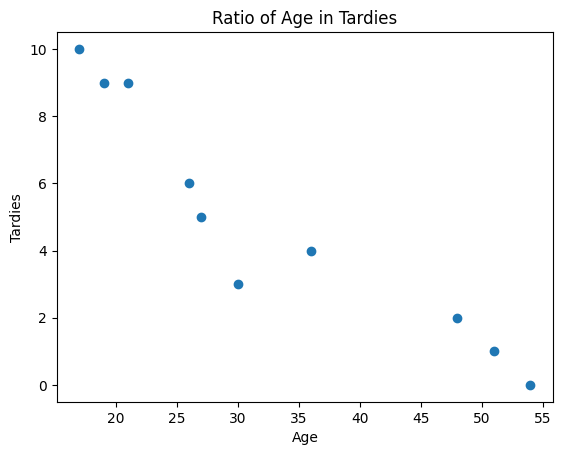

In [91]:
# Your code here.
plt.scatter(student_data["X"], student_data["Y"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Ratio of Age in Tardies")

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [92]:
# Your response here.
# Yes i see a trend. My hypotheses is that more age u have more u care about be puntual

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [93]:
# Your response here.
# correlation:
display(student_data.corr())

# covariance:
display(student_data.cov())

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [94]:
# Your response here.
# The corelation its an estandariced version of covariance that can only vary from -1 to 1 and both mesure the relation lineal of variables

Plot your regression model on your scatter plot.

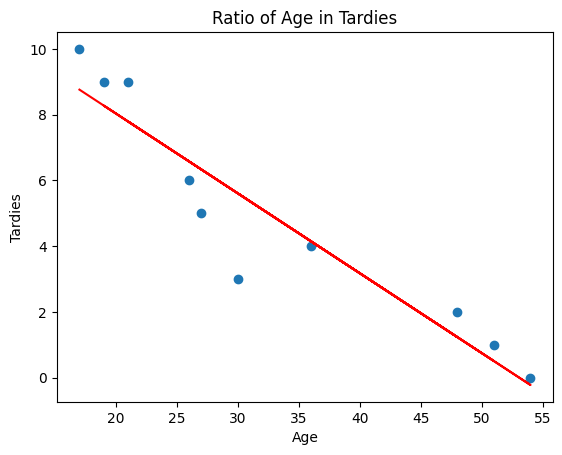

In [95]:
# Your code here.
plt.scatter(student_data["X"], student_data["Y"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Ratio of Age in Tardies")
model = linear_model.LinearRegression()
model.fit(student_data[["X"]], student_data["Y"])
y_pred = model.predict(student_data[["X"]])
plt.plot(student_data["X"], y_pred, color="red")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [96]:
# Your response here.
# Your model code and visualization here

# Answers to the questions

# Interpretation of the results of the model
# At this point, we can say that the linear regression model has been fitted using the provided data. We used age as the predictor variable (X) and tardiness as the target variable (Y).

# Model conclusions
# According to the model, we can conclude that there is a relationship between age and tardiness. However, it is important to consider that this is a linear relationship based on the available data. This means that as age increases, we expect tardiness to decrease. However, the relationship may not be perfect or causal, and there may be other factors influencing tardiness that are not captured in this model.

# Confidence in the conclusions
# The confidence in the model conclusions depends on various factors, such as the size and representativeness of the data sample used, the validity of the assumptions of the linear regression model, and the absence of omitted factors that could influence tardiness. Additionally, consider the model's goodness of fit, such as the coefficient of determination (R-squared) and the significance of the model coefficients. The stronger these indicators, the greater the confidence in the model conclusions.

# Conclusion on the predictive ability of age for tardiness
# Based on the model and the current results, we can say that age has some predictive ability in relation to tardiness. However, we cannot state with certainty that age is a strong predictor of tardiness without considering other factors and conducting additional analysis.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [97]:
# Import any libraries you may need & the data
df = pd.read_csv("vehicles.csv")
df.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [98]:
# Your response here.
df2 = df.loc[
    :,
    [
        "Year",
        "Cylinders",
        "Fuel Barrels/Year",
        "Combined MPG",
        "Fuel Cost/Year",
        "CO2 Emission Grams/Mile",
    ],
]
correlations = df2.corr()["CO2 Emission Grams/Mile"]
correlations
# Based on the calculated correlations, it appears that the variable 'Fuel Barrels/Year' has the highest correlation (0.9) with CO2 Emission Grams/Mile. This suggests that the amount of fuel consumed in barrels per year is likely to be the most important variable in determining CO2 emissions.
# The variable 'Year' has the lowest correlation (0.2) with CO2 Emission Grams/Mile among the variables considered. This indicates that the year of the vehicle may provide the least amount of helpful information in determining CO2 emissions.

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

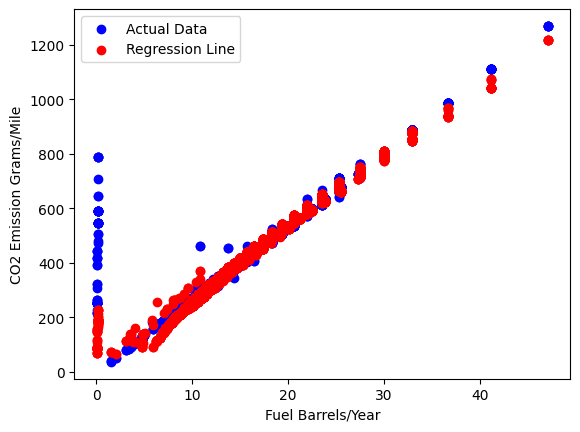

Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.888283646566


In [99]:
x = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]

model = linear_model.LinearRegression()

model.fit(x, y)
plt.scatter(x["Fuel Barrels/Year"], y, color="blue", label="Actual Data")
plt.scatter(
    x["Fuel Barrels/Year"], model.predict(x), color="red", label="Regression Line"
)
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("CO2 Emission Grams/Mile")
plt.legend()
plt.show()
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [100]:
# Your response here.
# Adding a constant term to the features
x = sm.add_constant(x)

# Creating and fitting the model
model = sm.OLS(y, x)
results = model.fit()

# Printing the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                             08:56:45   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [101]:
# Your code here.
df = pd.DataFrame(
    {
        "x": [
            1,
            3,
            4,
            6,
            8,
            9,
            11,
            14,
        ],
        "y": [
            1,
            2,
            4,
            4,
            5,
            7,
            8,
            13,
        ],
    }
)
df

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

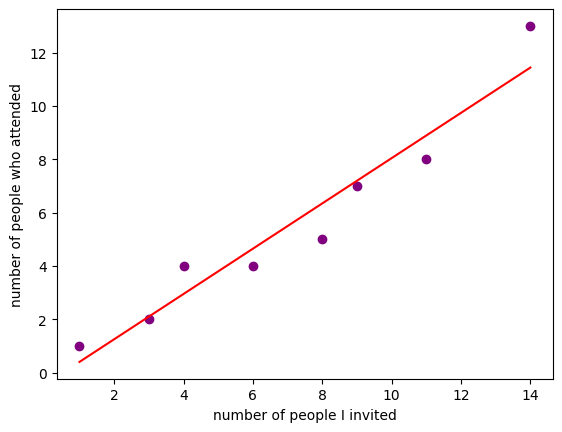

In [104]:
# Your code here.
plt.scatter(df['x'], df['y'], color='purple')
plt.xlabel("number of people I invited")
plt.ylabel("number of people who attended")
model = linear_model.LinearRegression()
model.fit(df[["x"]], df["y"])
y_pred = model.predict(df[["x"]])
plt.plot(df["x"], y_pred, color="red")

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here.
# There is a linear relation , when how much people its invited then more people its saying no

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.
# 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here.